# Problema del viajante (Traveling Salesman Problem)

Dataset de [Traveling Salesman Problem](https://www.kaggle.com/datasets/mexwell/traveling-salesman-problem/data?select=medium.csv)

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Cargar coordenadas y determinar el numero de ciudades

In [18]:
cols = ['x', 'y']
# Elija la cantidad de ciudades a cargar
data1 = pd.read_csv('data/tiny.csv', header=None, names=cols) # 10 ciudades
data2 = pd.read_csv('data/small.csv', header=None, names=cols) # 30 ciudades
data3 = pd.read_csv('data/medium.csv', header=None, names=cols) # 100 ciudades
data4 = pd.read_csv('data/large.csv', header=None, names=cols) # 1000 ciudades
all_data = {"10 cities":data1,"30 cities": data2, "100 cities": data3,"1000 cities": data4} 
data = all_data["10 cities"] # Cambiar por el dataset deseado
n_ciudades = len(data)
print("Columnas del dataset:", data.columns)  # Verificar nombres de columnas
n_ciudades = len(coordenadas)
print("Número de ciudades:", n_ciudades)  # Debe ser mayor que 0

# Verificar una muestra de coordenadas
print("Coordenadas de ejemplo:", coordenadas[0])

Columnas del dataset: Index(['x', 'y'], dtype='object')
Número de ciudades: 10
Coordenadas de ejemplo: [-1.0856306  -0.67888615]


Función `distancia_total`.  
Calcula la distancia total de una ruta

In [19]:
def distancia_total(ruta, coordenadas):
    distancia = 0.0
    for i in range(len(ruta)):
        ciudad_actual = int(ruta[i])  # Convertir a entero estándar
        ciudad_siguiente = int(ruta[(i + 1) % len(ruta)])  # Ídem
        dx = coordenadas[ciudad_actual, 0] - coordenadas[ciudad_siguiente, 0]
        dy = coordenadas[ciudad_actual, 1] - coordenadas[ciudad_siguiente, 1]
        distancia += np.sqrt(dx**2 + dy**2)
    return distancia

Función `generar_vecino`.  
Genera una nueva ruta intercambiando 2 ciudades aleatorias.

In [20]:
def generar_vecino(ruta_actual):
    nueva_ruta = ruta_actual.copy()
    i = np.random.randint(0, len(nueva_ruta))
    j = np.random.randint(0, len(nueva_ruta))
    nueva_ruta[i], nueva_ruta[j] = nueva_ruta[j], nueva_ruta[i]
    return nueva_ruta

Función `recocido_simulado`.  
Implemnta el algoritmo recocido simulado, el cual busca la ruta optima, aceptando rutas que mejoren la función costo.

In [21]:
def recocido_simulado(coordenadas, temp_inicial=100, enfriamiento=0.995, iter_por_temp=100):
    # Inicializar ruta aleatoria
    ruta_actual = np.random.permutation(len(coordenadas))
    costo_actual = distancia_total(ruta_actual, coordenadas)
    
    mejor_ruta = ruta_actual.copy()
    mejor_costo = costo_actual
    
    temp = temp_inicial
    evolucion_costo = []
    evolucion_costo.append(mejor_costo)

    while temp > 1e-3:
        for _ in range(iter_por_temp):
            # Generar vecino
            ruta_vecina = generar_vecino(ruta_actual)
            costo_vecino = distancia_total(ruta_vecina, coordenadas)
            evolucion_costo.append(costo_vecino)
            
            # Calcular diferencia de costo
            delta = costo_vecino - costo_actual
            
            # Aceptar o rechazar el vecino
            if delta < 0 or np.random.rand() < np.exp(-delta / temp):
                ruta_actual = ruta_vecina
                costo_actual = costo_vecino
                
                # Actualizar mejor solución
                if costo_actual < mejor_costo:
                    mejor_ruta = ruta_actual.copy()
                    mejor_costo = costo_actual
        
        # Enfriar temperatura
        temp *= enfriamiento
    
    return mejor_ruta, mejor_costo, evolucion_costo

Ejecutando el algoritmo

In [23]:
dic_evolucion = {}
resultados = {}
case = ['10 cities', '30 cities', '100 cities', '1000 cities']
for i in range(len(all_data)):
    coordenadas = all_data[case[i]][['x', 'y']].values
    ruta_optima, distancia_optima, evolucion = recocido_simulado(coordenadas)
    dic_evolucion[case[i]] = evolucion
    res = {'ruta_optima': ruta_optima, 'distancia_optima': distancia_optima}
    resultados[case[i]] = res

Crear la figura con 4 subgráficos de las rutas optimas

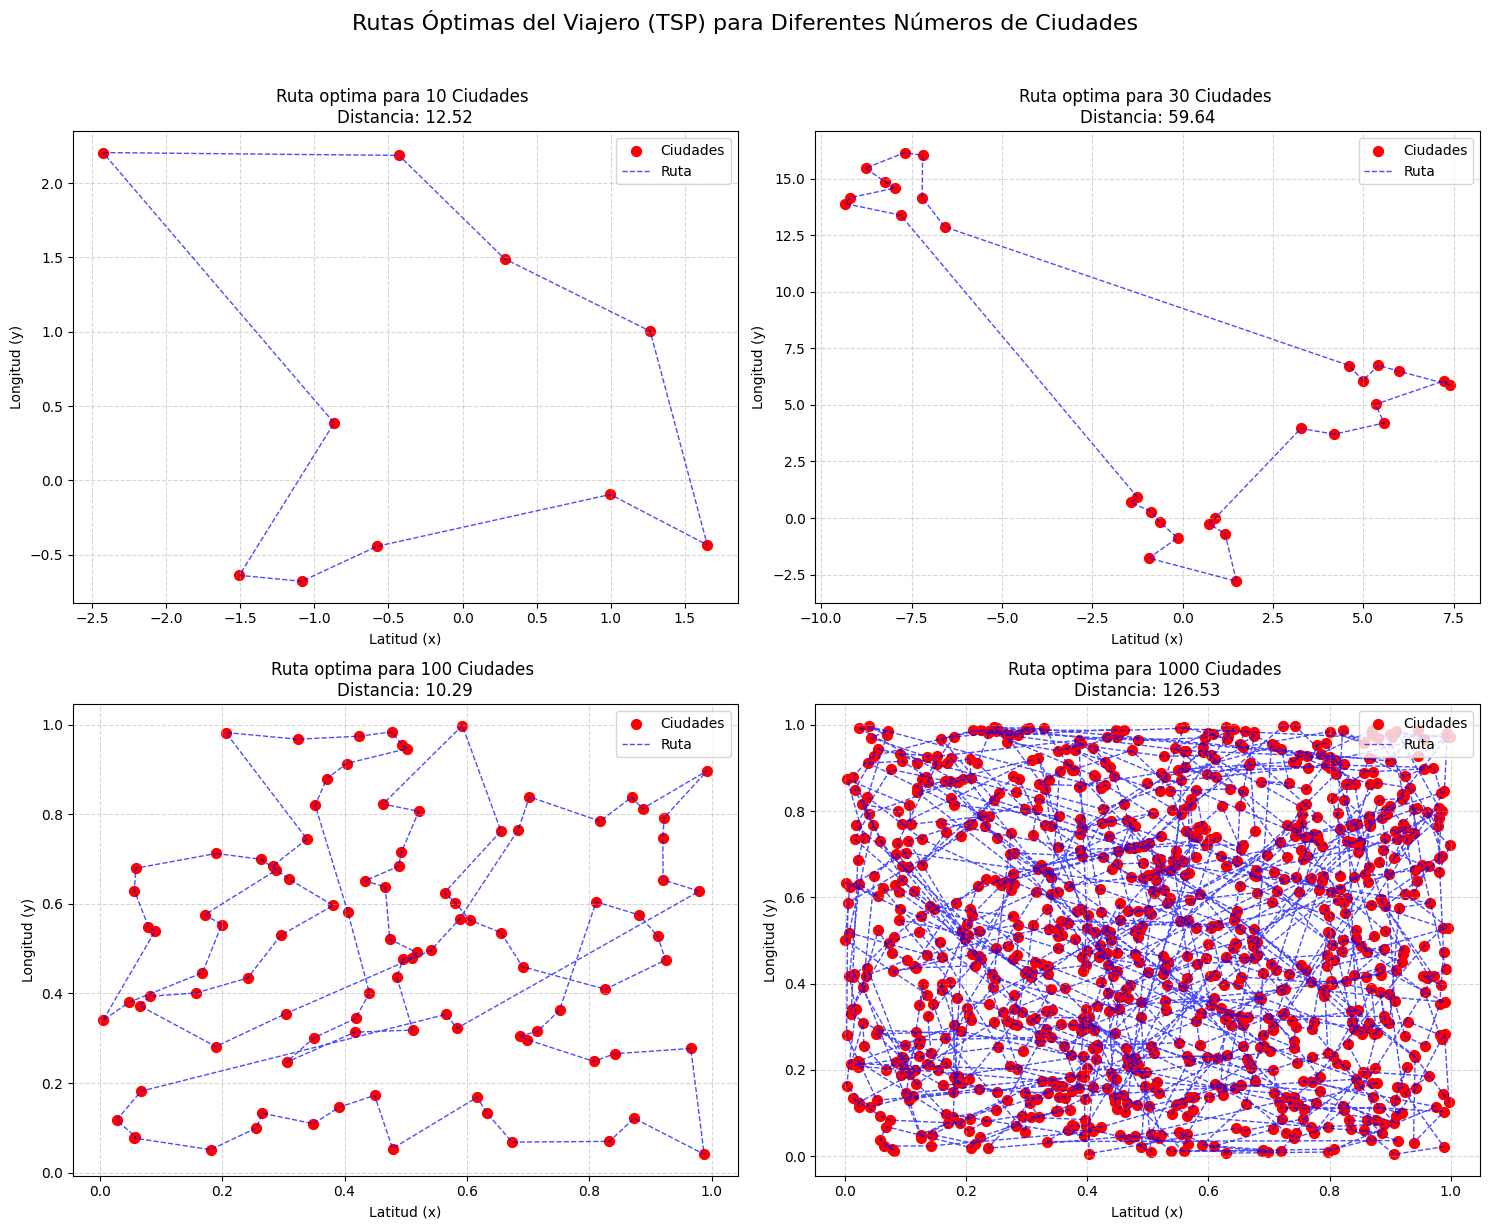

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle("Rutas Óptimas del Viajero (TSP) para Diferentes Números de Ciudades", fontsize=16, y=1.02)

# Ajustar espacio entre subgráficos
plt.subplots_adjust(hspace=0.3, wspace=0.2)

# Función para graficar en cada subgráfico
def plot_tsp(ax, coordenadas, ruta_optima, n_ciudades, titulo):
    ax.scatter(coordenadas[:, 0], coordenadas[:, 1], c='red', label='Ciudades', s=50)
    
    # Dibuja la ruta completa (incluyendo conexión final-inicial)
    ax.plot(
        # Coordenadas X: todas las ciudades en la ruta + la primera para cerrar el ciclo
        np.append(coordenadas[ruta_optima, 0], coordenadas[ruta_optima[0], 0]), 
        # Coordenadas Y: todas las ciudades en la ruta + la primera para cerrar el ciclo
        np.append(coordenadas[ruta_optima, 1], coordenadas[ruta_optima[0], 1]), 
        'b--', linewidth=1, alpha=0.7, label='Ruta'
    )
    
    ax.set_title(titulo)
    ax.set_xlabel("Latitud (x)")
    ax.set_ylabel("Longitud (y)")
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend(loc='upper right')


# Llenar los 4 subgráficos
for i, ax in enumerate(axs.flat):
    coordenadas = all_data[case[i]][['x','y']].values
    ruta_optima = resultados[case[i]]['ruta_optima']
    plot_tsp(ax, 
             coordenadas, 
             ruta_optima, 
             len(coordenadas),
             f"Ruta optima para {len(coordenadas)} Ciudades \nDistancia: {resultados[case[i]]['distancia_optima']:.2f}")

# Ajustar diseño y mostrar
plt.tight_layout()
plt.show()

Graficos de evolucion del algoritmo

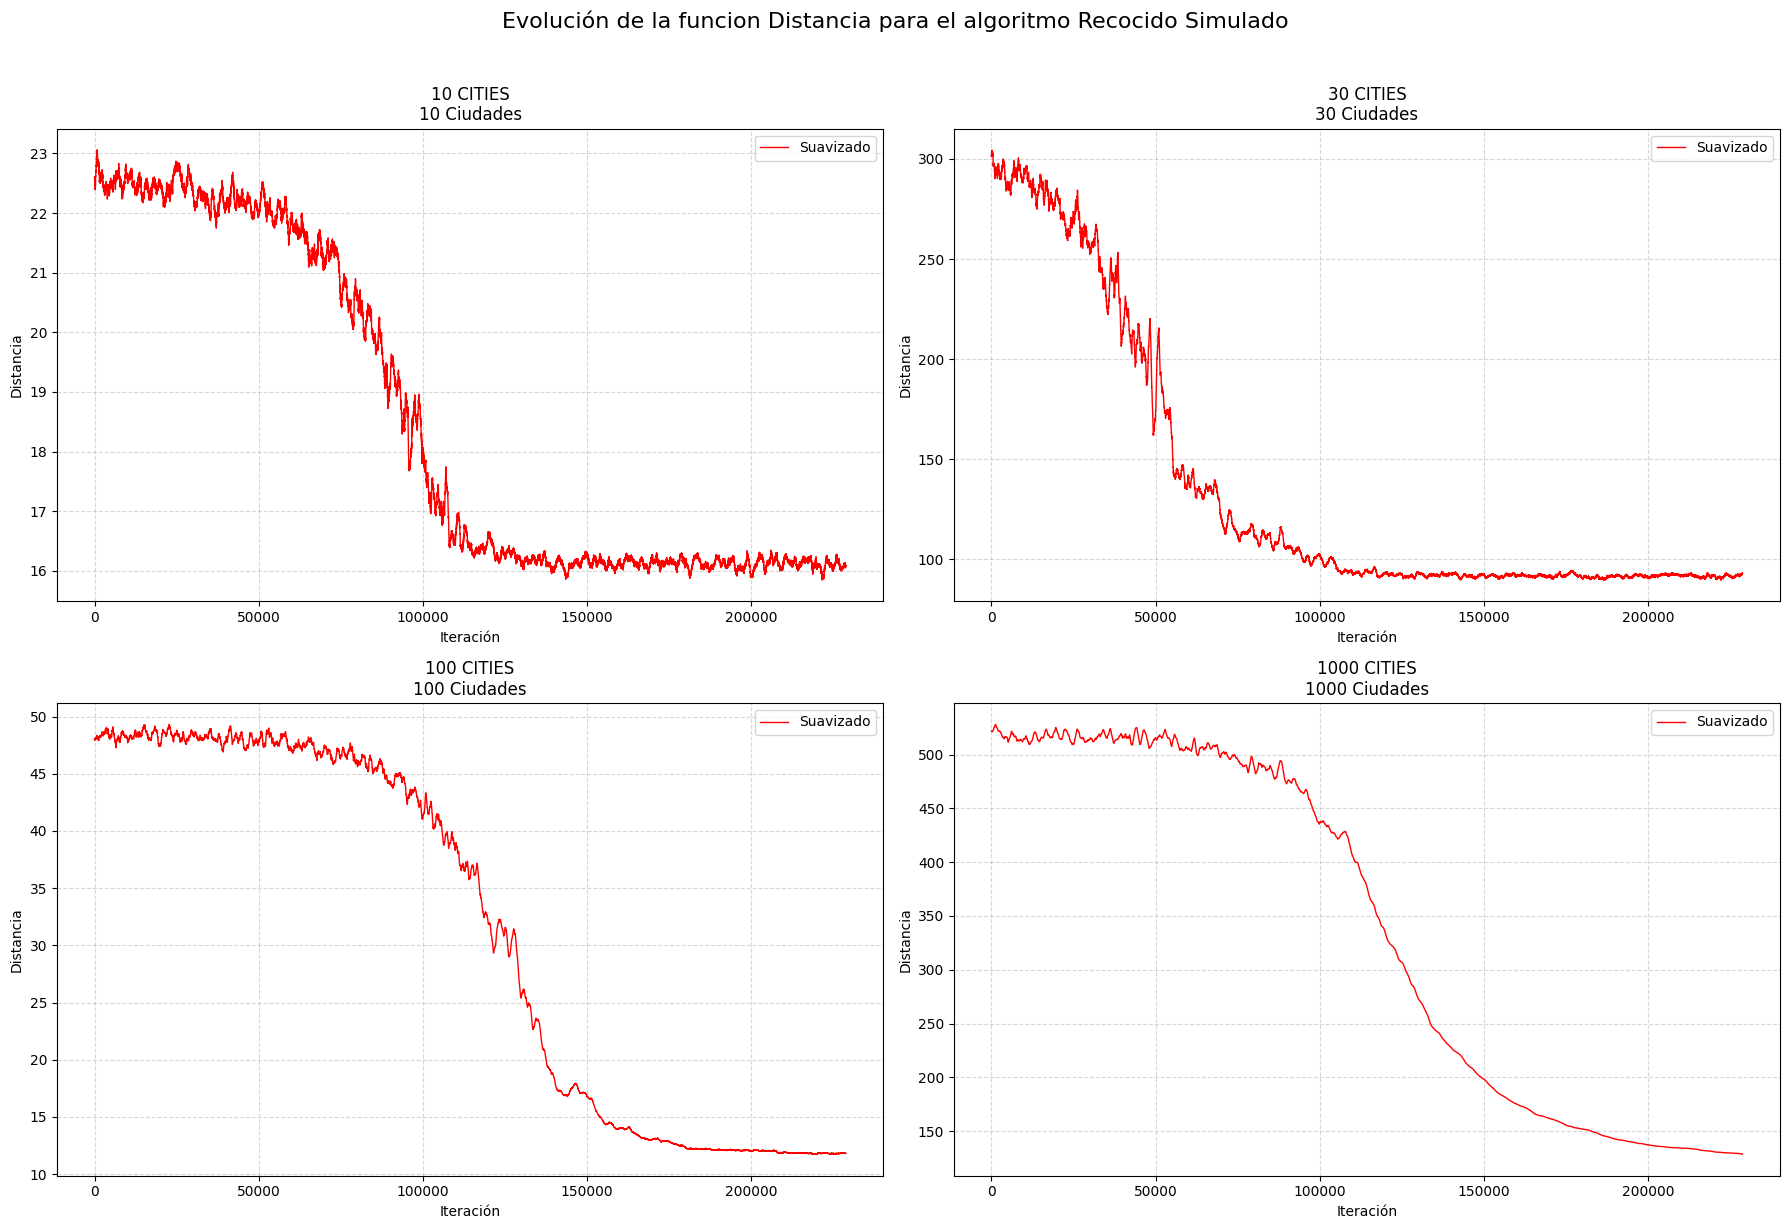

In [52]:
# Configurar la figura con 4 subgráficos (2x2)
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle("Evolución de la funcion Distancia para el algoritmo Recocido Simulado", fontsize=16, y=1.02)
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Casos a graficar
cases = ['10 cities', '30 cities', '100 cities', '1000 cities']
ciudades = [10, 30, 100, 1000]

# Función para crear cada gráfico
def plot_evolution(ax, evolucion, n_ciudades, case_name):
    # Media móvil con ventana de 1000
    ventana = 1000
    costos_suavizados = np.convolve(evolucion, np.ones(ventana)/ventana, mode='valid')
    
    ax.plot(costos_suavizados, 'r-', linewidth=1, label='Suavizado')
    ax.set_title(f"{case_name}\n{n_ciudades} Ciudades", fontsize=12)
    ax.set_xlabel("Iteración", fontsize=10)
    ax.set_ylabel("Distancia", fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend()

# Llenar los gráficos con datos del diccionario
for i, case in enumerate(cases):
    row = i // 2
    col = i % 2
    data = dic_evolucion[cases[i]]
    
    plot_evolution(axs[row, col], 
                 data, 
                 ciudades[i], 
                 case.upper())

plt.tight_layout()
plt.show()